<a href="https://colab.research.google.com/github/hodanourian/Forecasting-and-Predictive-Analytics/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 6 : Hoda, Elnaz, Sahar

### **Generate Syntactic ARMA(p,q) Time Series Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
def acf1(x, nlags=None, acf_type='correlation', pacf=False, ax=None, return_values=False, **kwargs):
    """
    Calculate and optionally plot the autocorrelation or partial autocorrelation function.

    Parameters:
    - x: Input time series.
    - nlags: Number of lags to compute.
    - acf_type: 'correlation' for autocorrelation, 'covariance' for autocovariance.
    - pacf: If True, computes partial autocorrelation instead of autocorrelation.
    - ax: Matplotlib axis to plot on. If None, a new axis is created.
    - return_values: If True, the function will return the ACF/PACF values and lags.
    - **kwargs: Additional keyword arguments for the plot.

    Returns:
    - If return_values is True, returns (lags, values).
    """
    lags = np.arange(1, nlags + 1)

    if pacf:
        if acf_type == 'correlation':
            values = sm.tsa.pacf(x, nlags=nlags)[1:]
            ylabel = 'PACF'
    else:
        if acf_type == 'correlation':
            values = sm.tsa.acf(x, nlags=nlags, fft=False)[1:]
            ylabel = 'ACF'
        elif acf_type == 'covariance':
            values = sm.tsa.acovf(x, nlag=nlags)[1:]
            ylabel = 'ACoV'

    if return_values:
        return lags, values

    if ax is None:
        ax = plt.gca()

    ax.bar(lags, values, **kwargs)
    ax.axhline(0, color='black', linewidth=1)
    if acf_type == 'correlation':
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color='red', linestyle='--', linewidth=1)
        ax.axhline(-conf_level, color='red', linestyle='--', linewidth=1)
    ax.set_xlabel('LAG')
    ax.set_ylabel(ylabel)

    return ax


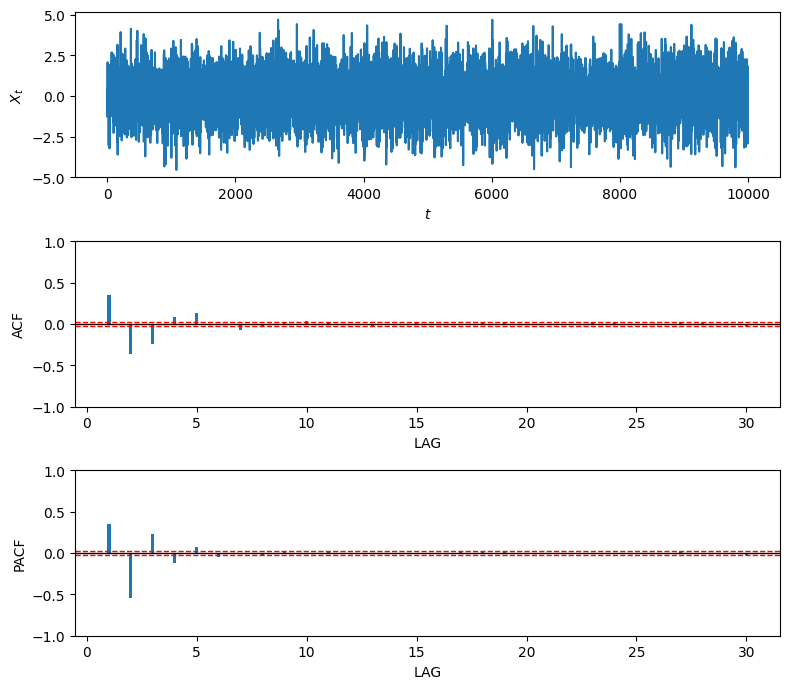

In [3]:
# Generate the ARMA(2,1) model X_t = 0.3 * X_{t-1} - 0.4 * X{t-2} + 0.4 * W_{t-1} -  0.1 * W_{t-2} + W_t

n = 10000 # sample size
phi = [1, -0.3, 0.4]
theta = [1, 0.4, -0.1]
sd = 1.0

arma_ts = sm.tsa.arma_generate_sample(ar = phi, ma = theta, nsample = n, scale = sd)
arma_ts = pd.Series(arma_ts, index = range(n))

# Plot time series
fig, axes = plt.subplots(nrows = 3, figsize = (8,7))

arma_ts.plot(ax = axes[0])
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('$X_t$')

acf1(arma_ts, nlags = 30, ax = axes[1], width = 0.15)
axes[1].set_ylim(-1, 1)

acf1(arma_ts, nlags = 30, ax = axes[2], width = 0.15, pacf = True)
axes[2].set_ylim(-1, 1)

fig.tight_layout()
plt.show()

## **Fit an ARMA Model**

In [5]:
# Fit an ARMA(3,5) model
model = sm.tsa.arima.ARIMA(arma_ts, order=(3, 0, 5))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -14246.153
Date:                Fri, 19 Dec 2025   AIC                          28512.305
Time:                        03:49:47   BIC                          28584.409
Sample:                             0   HQIC                         28536.712
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.012      0.090      0.928      -0.022       0.024
ar.L1          1.0705      0.276      3.872      0.000       0.529       1.612
ar.L2         -0.7264      0.086     -8.463      0.0

In [6]:
# Fit an ARMA(3,4): refining

model = sm.tsa.arima.ARIMA(arma_ts, order=(3, 0, 4))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 4)   Log Likelihood              -14246.405
Date:                Fri, 19 Dec 2025   AIC                          28510.809
Time:                        03:50:37   BIC                          28575.702
Sample:                             0   HQIC                         28532.775
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.012      0.090      0.928      -0.022       0.024
ar.L1          1.1073      0.268      4.124      0.000       0.581       1.634
ar.L2         -0.6956      0.083     -8.363      0.0

In [7]:
# Fit an ARMA(3,3): refining

model = sm.tsa.arima.ARIMA(arma_ts, order=(3, 0, 3))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -14247.324
Date:                Fri, 19 Dec 2025   AIC                          28510.649
Time:                        03:51:05   BIC                          28568.332
Sample:                             0   HQIC                         28530.174
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.012      0.084      0.933      -0.023       0.025
ar.L1          0.4153      0.974      0.426      0.670      -1.495       2.325
ar.L2         -0.4762      0.275     -1.732      0.0

In [8]:
# Fit an ARMA(3,2): refining

model = sm.tsa.arima.ARIMA(arma_ts, order=(3, 0, 2))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -14246.853
Date:                Fri, 19 Dec 2025   AIC                          28507.707
Time:                        03:51:50   BIC                          28558.179
Sample:                             0   HQIC                         28524.791
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.012      0.084      0.933      -0.023       0.025
ar.L1         -0.3045      0.209     -1.457      0.145      -0.714       0.105
ar.L2         -0.2906      0.043     -6.758      0.0

In [9]:
# Fit an ARMA(2,2): refining

model = sm.tsa.arima.ARIMA(arma_ts, order=(2, 0, 2))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14247.796
Date:                Fri, 19 Dec 2025   AIC                          28507.593
Time:                        03:52:09   BIC                          28550.855
Sample:                             0   HQIC                         28522.237
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.012      0.085      0.932      -0.022       0.024
ar.L1          0.2838      0.025     11.520      0.000       0.235       0.332
ar.L2         -0.4192      0.012    -35.319      0.0

In [10]:
# Fit an ARMA(2,2) model: refining with no intercept

model = sm.tsa.arima.ARIMA(arma_ts, order=(2, 0, 2), trend = 'n')
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14247.800
Date:                Fri, 19 Dec 2025   AIC                          28505.600
Time:                        03:52:21   BIC                          28541.652
Sample:                             0   HQIC                         28517.803
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2838      0.025     11.520      0.000       0.235       0.332
ar.L2         -0.4192      0.012    -35.319      0.000      -0.443      -0.396
ma.L1          0.4211      0.026     15.950      0.0

Input model: $X_t = 0.3 X_{t-1} - 0.4 X_{t-2} + 0.4 W_{t-1} - 0.1 W_{t-2} + W_t$

sigma=1

Fitted model: $X_t = 0.28 X_{t-1} - 0.4 X_{t-2} + 0.4 W_{t-1}- 0.07 W_{t-2} + W_t$

sigma=0.9978

***The fitted ARMA model closely matches the input model, with very small differences in the estimated coefficients. The noise variance is also almost identical (σ ≈ 1), indicating a very good fit.***